<a href="https://colab.research.google.com/github/Manisha0912/Manisha/blob/main/YBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Title

# New Section

**SERVO PREDICTION USING LINEAR REGRESSION**

**OBJECTIVE**:This project aim is to build a model that predicts servo behaviour accurately using linear regression,accuracy,improving performance analysis.

**DATA SOURCE** : YBI Foundation
" https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Servo%20Mechanism.csv"

**IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

**IMPORT DATASET**

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Servo%20Mechanism.csv')
df

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6
...,...,...,...,...,...
162,B,C,3,2,44
163,B,E,3,1,40
164,C,D,4,3,25
165,A,B,3,2,44


**DESCRIBE DATA**

In [ ]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


**DATA** **VISUALIZATION**

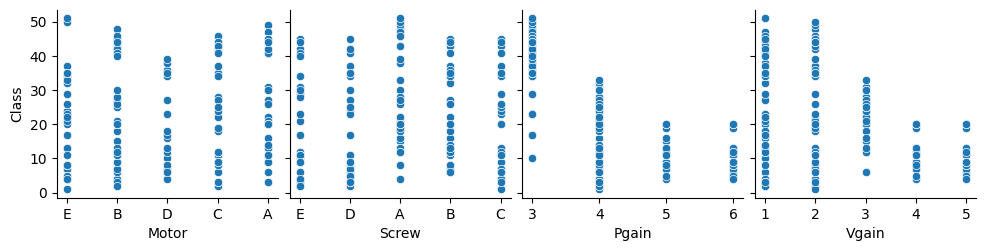

In [ ]:
sns.pairplot(df,x_vars=['Motor','Screw','Pgain','Vgain'],y_vars=['Class']);

**DATA PREPROCESSING**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [ ]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [ ]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [ ]:
df.size

835

**Get categories and counts of categorical variables**

In [ ]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [ ]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

Get encoding of Categorical values

In [ ]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [ ]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

**Define Target Variable(y) and Feature variables(X)**

In [ ]:
y=df['Class']

In [ ]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [ ]:
X=df[['Motor','Screw','Pgain','Vgain']]

In [ ]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


 **TRAIN TEST SPLIT**  

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)
X_train

,Motor,Screw,Pgain,Vgain
138,1,4,4,1
32,2,4,4,1
145,4,2,3,2
48,2,4,3,2
98,1,3,3,2
...,...,...,...,...
72,2,1,5,4
143,0,1,4,2
60,4,1,4,2
50,3,0,6,5


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((125, 4), (42, 4), (125,), (42,))

**MODELING**

In [ ]:
#select a  model from sklearn
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

**Model evaluation**

In [ ]:
model.intercept_

80.5376313716901

In [ ]:
model.coef_

array([ -1.84562802,  -2.99082183, -15.29858459,   5.13523517])

**Prediction**

In [ ]:
#step-7:prediction
y_pred=model.predict(X_test)

In [ ]:
#step-8:accuracy
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.7695731053957344

**Explaination**

In a servo prediction project using linear regression, the aim is to predict the performance of a servo motor, based on various input features like Motor,screw,Pgain,Vgain. The project involves collecting and preprocessing the data, selecting relevant features, and splitting the data into training and testing sets. A linear regression model is then trained on the training data to establish a linear relationship between the input features and the target variable. The model's performance is evaluated using Mean Absolute Percentage Error (MAPE), which measures the accuracy of the predictions. In this case, the MAPE is 0.76957, indicating the average percentage error of the predictions compared to the actual values. The accuracy can be derived from MAPE using the formula
Accuracy=1−MAPE
Accuracy=1−MAPE, resulting in an accuracy of approximately 23.043%, which suggests that the model's predictions deviate significantly from the actual values.